In [147]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
print("TensorFlow v" + tf.__version__)

TensorFlow v2.13.0


In [148]:
train = pd.read_csv('./spaceship-titanic/train.csv')
test = pd.read_csv('./spaceship-titanic/test.csv')
train.describe()
train.info()
train.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


C:\Users\111\AppData\Local\Temp\ipykernel_20512\489434985.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:xlabel='Destination', ylabel='Transported'>

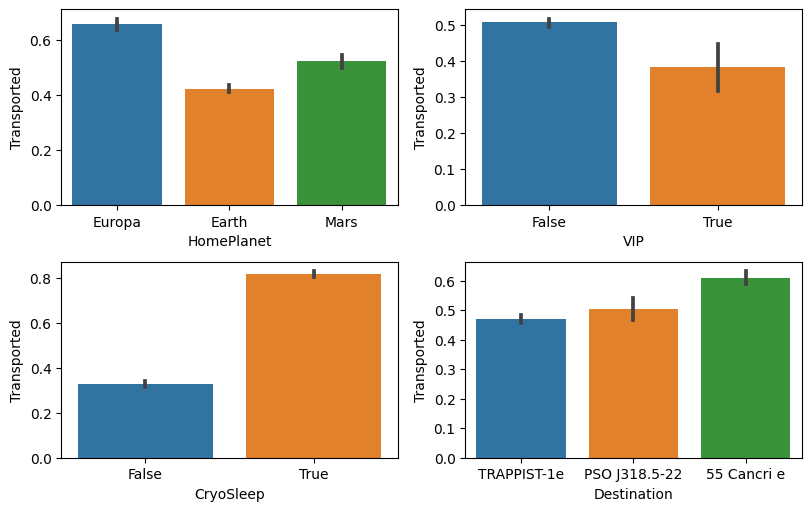

In [149]:
fig, ax =plt.subplots(2,2,constrained_layout=True, figsize=(8, 5))
sns.barplot(x='HomePlanet', y='Transported', data=train, ax=ax[0][0])
sns.barplot(x='VIP', y='Transported', data=train, ax=ax[0][1])
sns.barplot(x='CryoSleep', y='Transported', data=train, ax=ax[1][0])
sns.barplot(x='Destination', y='Transported', data=train, ax=ax[1][1])


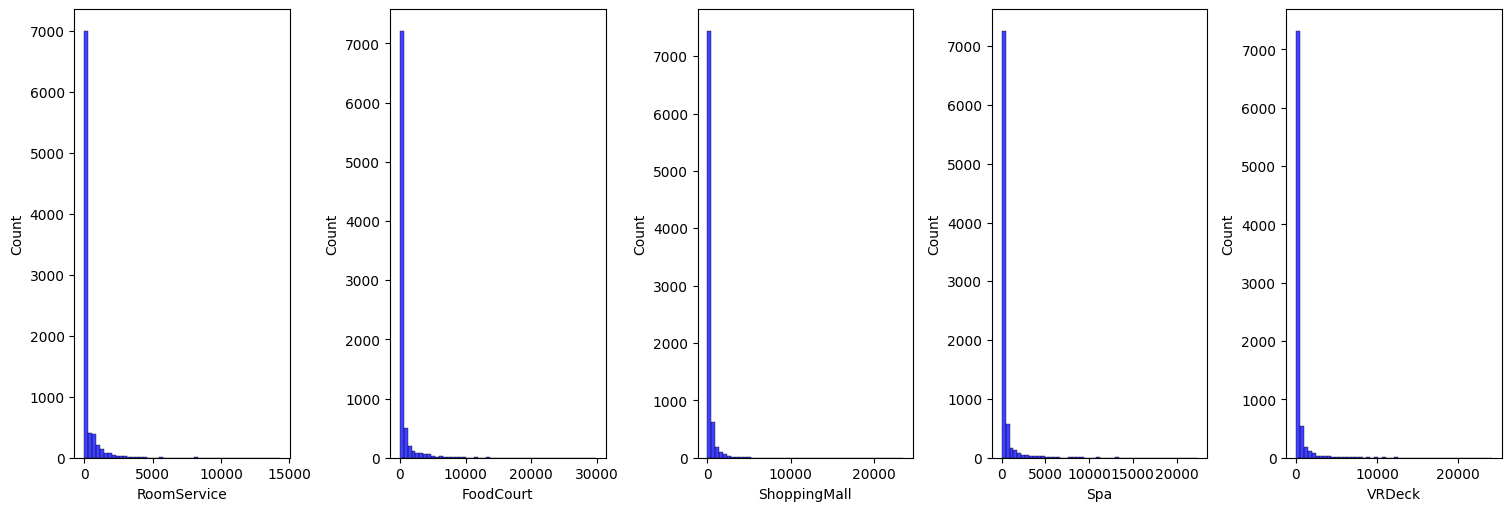

In [150]:
fig, ax =plt.subplots(1,5,constrained_layout=True, figsize=(15, 5))
sns.histplot(train['RoomService'], color='b', bins=50, ax=ax[0]);
sns.histplot(train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(train['VRDeck'], color='b', bins=50, ax=ax[4]);

增加对数据的可视化部分，方便理解数据的分布情况，同时我们可以通过各个属性和预测值的关系来判断是否需要抛弃某些属性，如姓名等.

In [151]:
train.isnull().mean() # check missing values

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [152]:
# 将Cabin列中的数据用/分割成单独的列
train[['Deck','Num','Side']] = train['Cabin'].str.split('/',expand=True)
test[['Deck','Num','Side']] = test['Cabin'].str.split('/',expand=True)

# 抛弃其中不需要的值
train = train.drop(['Num'],axis=1)
test = test.drop(['Num'],axis=1)

# 抛弃Cabin等列
train.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)

In [153]:
# 处理Age
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [154]:
# 处理HomePlanet和Destination
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)

In [155]:
# 处理VIP和CryoSleep
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
# 将bool值转换为int
train['VIP'] = train['VIP'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

In [156]:
# 处理RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
train['RoomService'].fillna(train['RoomService'].mean(), inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].mean(), inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(), inplace=True)
train['Spa'].fillna(train['Spa'].mean(), inplace=True)
train['VRDeck'].fillna(train['VRDeck'].mean(), inplace=True)
test['RoomService'].fillna(test['RoomService'].mean(), inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(), inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(), inplace=True)
test['Spa'].fillna(test['Spa'].mean(), inplace=True)
test['VRDeck'].fillna(test['VRDeck'].mean(), inplace=True)
# 根据数据能发现，CryoSleep为True时，这些值都为0
train.loc[train['CryoSleep']==1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
test.loc[test['CryoSleep']==1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [157]:
# 处理Deck和Side
train['Deck'].fillna(train['Deck'].mode()[0], inplace=True)
train['Side'].fillna(train['Side'].mode()[0], inplace=True)
test['Deck'].fillna(test['Deck'].mode()[0], inplace=True)
test['Side'].fillna(test['Side'].mode()[0], inplace=True)

In [158]:
train.isnull().mean() # check missing values

HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
Deck            0.0
Side            0.0
dtype: float64

In [165]:
train.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S
5,Earth,0,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,True,F,P
6,Earth,0,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,True,F,S
7,Earth,1,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,True,G,S
8,Earth,0,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,True,F,S
9,Europa,1,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,True,B,P


完成数据处理前的可视化部分后，需要进行特征工程，对数据进行处理，使其符合模型的要求，如将文本数据转换为数值型数据，将缺失值进行填充，数据拆分，独热编码等。
考虑的决策树的特征，如TFDF，xgboost，决策森林等能够自适应特征，先不对特征进行归一化处理，后续可以考虑对特征进行归一化处理，看看是否会有提升。

模型搭建